# Project Case: Boston Housing Data
**Coursera Statistics for Data Science with Python - Final Assignment**

**Kostas Katis**

Dataset variables description:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Libraries and dataset load

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(url)


In [3]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### For the "Median value of owner-occupied homes" provide a boxplot

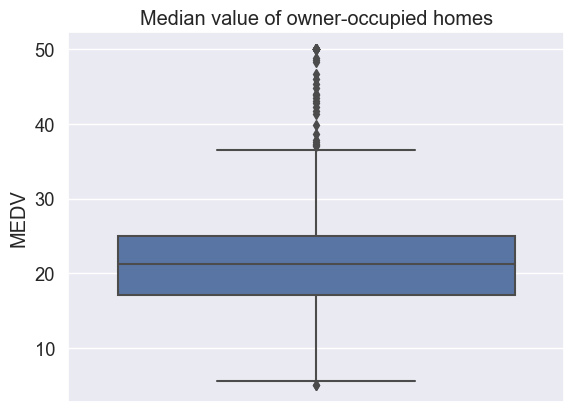

In [5]:
sns.set_style('dark')
sns.set(font_scale=1.2)
ax=sns.boxplot(y='MEDV',data=df).set(title='Median value of owner-occupied homes')
plt.show()

The boxplot above shows the median value (or 2nd quartile) for the variable MEDV inside the box specified by the 1st and 3rd quartiles. 

### Provide a  bar plot for the Charles river variable

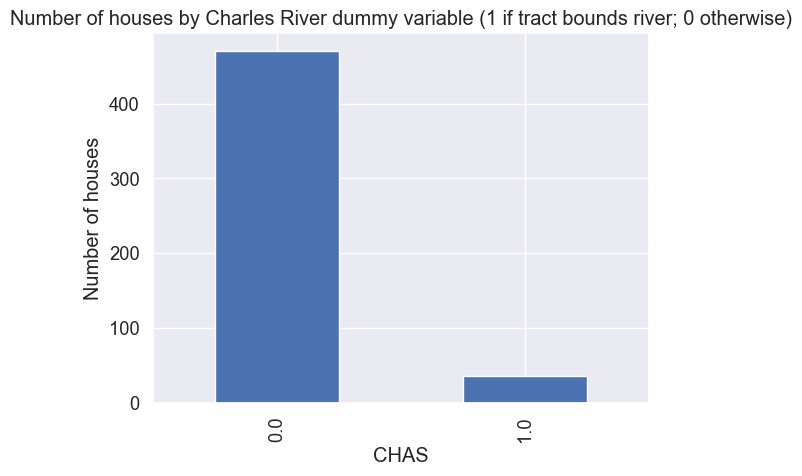

In [6]:
df.groupby('CHAS')['MEDV'].count().plot(kind="bar")
plt.ylabel('Number of houses')
plt.title('Number of houses by Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
plt.show()

The bar plot above shows that majority of houses are not by the Charles river.

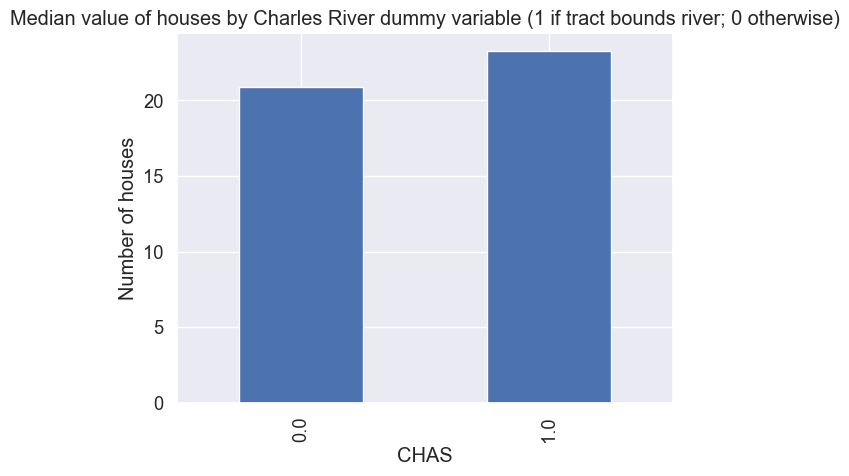

In [7]:
df.groupby('CHAS')['MEDV'].median().plot(kind="bar")
plt.ylabel('Number of houses')
plt.title('Median value of houses by Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
plt.show()

The bar plot above shows that the median value of houses by Chrales river is higher than the rest.

### Provide a boxplot for the MEDV variable vs the AGE variable. 


In [8]:
#Discretize the age variable into three groups:
# of 35 years and younger, 
# between 35 and 70 years and 
# 70 years and older)

df.loc[(df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
df.loc[(df['AGE'] > 35)&(df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
df.loc[(df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [9]:
#Corvert string categories to ordered categories for meaningfull representation of categories in x axis, 
# i.e. the age groups are ordered properly "35 years and younger" < "between 35 and 70 years" < "70 years and older"

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=["35 years and younger", "between 35 and 70 years", "70 years and older"],ordered=True)
df['AGE_GROUP'] = df['AGE_GROUP'].astype(cat_type)

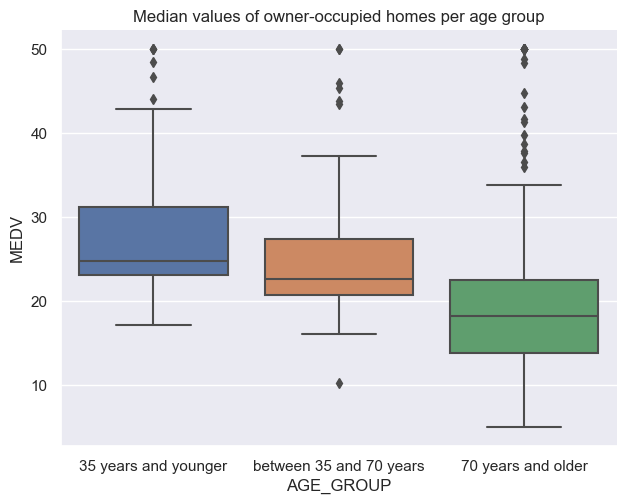

In [11]:
sns.set(font_scale=1)
sns.catplot(height=5, aspect=9/7,data=df, x="AGE_GROUP", y="MEDV", kind="box").set(title='Median values of owner-occupied homes per age group')
plt.show()

The boxplot above shows that in general the value of owner occupied homes is decreasing as the age is increasing.

### Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 

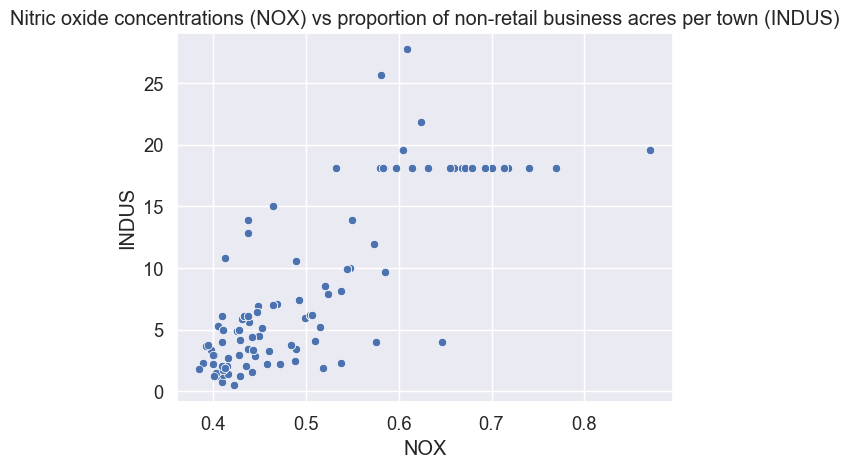

In [25]:
sns.set(font_scale=1.2)
sns.scatterplot(x='NOX',y='INDUS',data=df).set_title('Nitric oxide concentrations (NOX) vs proportion of non-retail business acres per town (INDUS)')
plt.show()

**Conclusion:** There is possitive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.

### Create a histogram for the pupil to teacher ratio variable

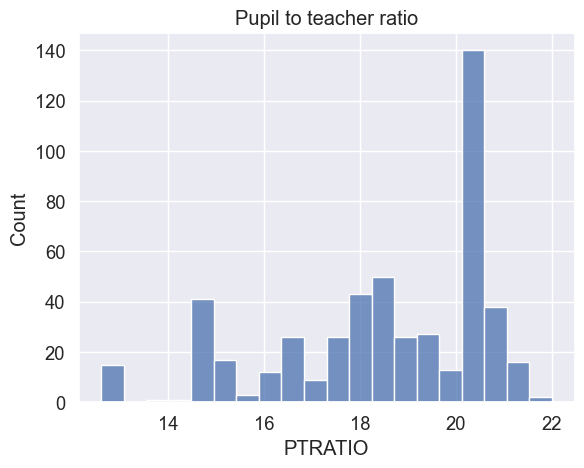

In [26]:
sns.histplot(data = df['PTRATIO'], bins=20,kde = False).set_title('Pupil to teacher ratio')
plt.show()

### Difference in median value of houses bounded by the Charles river

In [ ]:
# Check the two distributions (bounded, unbounded) in a histogram

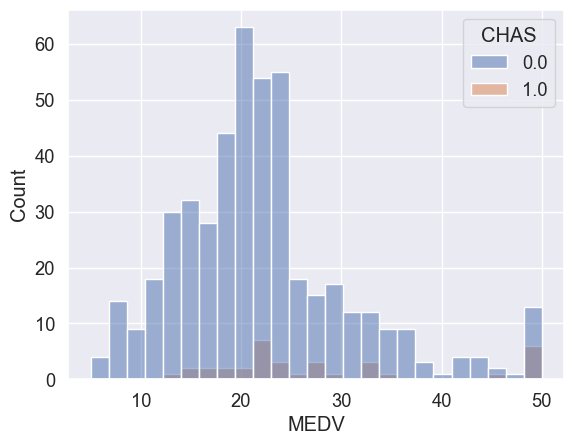

In [27]:
sns.histplot(data=df,x="MEDV", hue='CHAS',bins=25)
plt.show()

From the above histogram it is hard to conclude about the median values of the two categories. 
We proceed with the hypothesis testing.

Hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in houses median value between houses bounded by Charles river and not bounded")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in houses median value between houses bounded by Charles river and not bounded")

In [15]:
import scipy as sp

In [16]:
# First we check wheather the variances of the two samples are eqal 

sp.stats.levene(df.loc[df['CHAS']==1]['MEDV'],df.loc[df['CHAS']==0]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Since the p_value=0.00324 is less than 0.05 we assume unequal variances and proceed with Welch’s t-test, which does not assume equal population variances.

In [34]:
sp.stats.ttest_ind(df.loc[df['CHAS']==1]['MEDV'],df.loc[df['CHAS']==0]['MEDV'],equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses based on their location with regards to Charles river bound.

### Median values of houses for each proportion of owner occupied units built prior to 1940

Check the three age groups distributions in a histogram

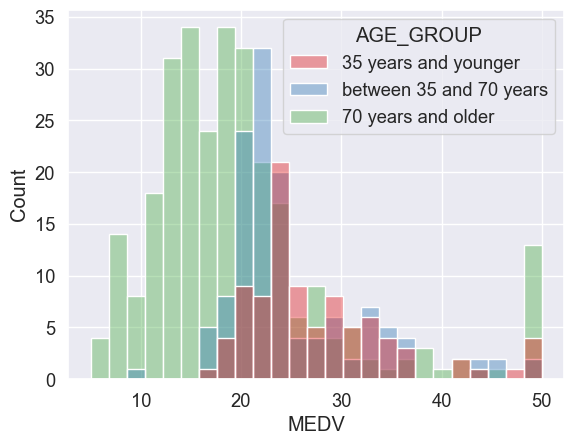

In [35]:
sns.histplot(data=df,x="MEDV", hue='AGE_GROUP',bins=25,palette="Set1",alpha=0.4)
plt.show()

First impression is that there are significant differences among the median values of the three groups. ANOVA test should provide the verdict.

Hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


Test for equality of variance:

In [28]:
sp.stats.levene(df[df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                df[df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                df[df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                center='mean')


LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Since the p-value is mess than 0.05, the variance are equal and therefore we perform a standard independent 2 sample test that assumes equal population variances (default of equal_var=True in one-way ANOVA test).

Now, run a one-way ANOVA.

In [29]:
f_statistic, p_value = sp.stats.f_oneway(df[df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                                            df[df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'],
                                            df[df['AGE_GROUP'] == '70 years and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town



In [36]:
sp.stats.pearsonr(df['NOX'], df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061240043e-98)

**Conclusion:** Since the Pearson Coefficient is 0.76365 and p-value less than 0.05, we reject the Null Hypothesis and conclude that there is positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town. This is confirmed also by the scatterplot shown before.

## Impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [38]:
import statsmodels.api as sm
X = df['DIS']
y = df['MEDV']

# Adding column of ones to input as model OLS recquires:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
prediction = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.21e-08
Time:                        10:57:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**  From the coef column we can find the regression coefficients and therefore the regression equation is:

MEDV = 18.3901 + 1.0916*DIS

This means that each additional weighted distance to the 5 empolyment centers in boston is associated with an average increase in the median value of owner occupied homes of 1.9824 points.